In [2]:
import pandas as pd
import numpy as np

import cv2
import qrcode

import matplotlib.pyplot as plt
import os

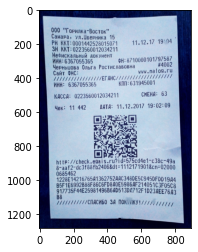

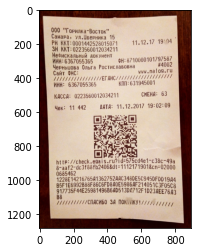

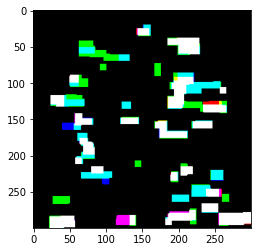

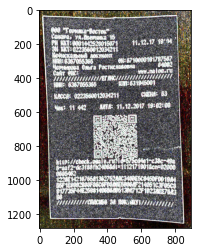

In [20]:
import cv2
img = cv2.imread("qr_codes/original.jpg")
gray = cv2.cvtColor(img, cv2.CALIB_CB_CLUSTERING)

gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)


crop_img = closed[600:900, 300:600]

plt.imshow(img)
plt.show()

plt.imshow(gray)
plt.show()

plt.imshow(crop_img)
plt.show()

plt.imshow(gradient)
plt.show()

In [33]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode

def decoder(image):
    gray_img = cv2.cvtColor(image,0)
    barcode = decode(gray_img)

    for obj in barcode:
        points = obj.polygon
        pts = np.array(points, np.int32)
        pts = pts.reshape((-1, 1, 2))
        cv2.polylines(image, [pts], True, (0, 255, 0), 3)

        barcodeData = obj.data.decode("utf-8")
        barcodeType = obj.type
        string = "Data " + str(barcodeData) + " | Type " + str(barcodeType)
        print(string)
        # cv2.putText(frame, string, (x,y), cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0), 2)
        print("Barcode: "+barcodeData +" | Type: "+barcodeType)

path = r"C:/Users/HardWorkingStation/PyProjects/codes_detection/qr_codes/"

for img_name in os.listdir(path):
    img_path = path + img_name
    img = cv2.imread(img_path)
    decoder(img)

Data t=20170421T221919&s=279.90&fn=8710000100487015&i=1626&fp=1887921601&n=1 | Type QRCODE
Barcode: t=20170421T221919&s=279.90&fn=8710000100487015&i=1626&fp=1887921601&n=1 | Type: QRCODE
Data t=20190411T1620&s=199.00&fn=9289000100355637&i=4522&fp=4253291993&n=1 | Type QRCODE
Barcode: t=20190411T1620&s=199.00&fn=9289000100355637&i=4522&fp=4253291993&n=1 | Type: QRCODE
Data http://freshvote.ru/?arts=26928;29635;22061;35934;service_clean;&amp;p=019 | Type QRCODE
Barcode: http://freshvote.ru/?arts=26928;29635;22061;35934;service_clean;&amp;p=019 | Type: QRCODE
Data http://check.egais.ru?id=575cd4e1-c38c-49a8-aaf2-dc3f88fb2406&dt=1112171901&cn=020000685462 | Type QRCODE
Barcode: http://check.egais.ru?id=575cd4e1-c38c-49a8-aaf2-dc3f88fb2406&dt=1112171901&cn=020000685462 | Type: QRCODE
Data t=20200627T1831&s=1009.00&fn=9251440300028199&i=58364&fp=2102598135&n=1  | Type QRCODE
Barcode: t=20200627T1831&s=1009.00&fn=9251440300028199&i=58364&fp=2102598135&n=1  | Type: QRCODE
Data t=20190221T1922&